In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#Alterando configurações padrão dos plots
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 5)

In [10]:
#Leitura do dataset
df = pd.read_csv('dados_limpos_ceaps.csv', encoding='latin1', parse_dates=['DATA'])

In [11]:
#Primeiras linhas do dataset
df.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
0,2016,1,SENADOR 1,Aluguel,05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011328,2016-01-13,Despesa com pagamento de energia elétrica para...,73.60
1,2016,1,SENADOR 1,Aluguel,05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011327,2016-01-18,Pagamento de energia elétrica para o escritóri...,206.84
2,2016,1,SENADOR 1,Aluguel,004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/16,2016-04-01,"Despesa com pagamento de aluguel, utilizado pa...",6000.00
3,2016,1,SENADOR 1,Aluguel,05.423.963/0001-11,OI MÓVEL S.A.,661639001,2016-01-16,despesa com pagamento de telefonia para o escr...,407.48
4,2016,1,SENADOR 1,Despesas gerais,62.652.961/0001-38,AGÊNCIA ESTADO S.A.,00608918,2016-06-01,Aquisição de publicação virtual de conteúdo jo...,550.00


In [12]:
#Verificando como o Pandas está interpretando cada coluna
df.dtypes

ANO                           int64
MES                           int64
SENADOR                      object
TIPO_DESPESA                 object
CNPJ_CPF                     object
FORNECEDOR                   object
DOCUMENTO                    object
DATA                 datetime64[ns]
DETALHAMENTO                 object
VALOR_REEMBOLSADO           float64
dtype: object

In [13]:
#Dados estatísticos de cada coluna numérica
df.describe()

,ANO,MES,VALOR_REEMBOLSADO
count,26691.0,26691.000000,26691.000000
mean,2016.0,6.470908,947.484513
std,0.0,3.257134,2733.820037
min,2016.0,1.000000,0.010000
25%,2016.0,4.000000,124.000000
50%,2016.0,6.000000,324.790000
75%,2016.0,9.000000,956.865000
max,2016.0,12.000000,256980.000000


In [21]:
#Seleção condicional onde pegamos todos as linhas cujo o valor reembolsado é R$ 0,01
df[df['VALOR_REEMBOLSADO'] == 0.01]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
6847,2016,3,SENADOR 29,Passagens,07.575.651/0001-59,GOL,NFPJ4Z,2016-03-22,"Companhia Aérea: GOL, Localizador: NFPJ4Z. Pas...",0.01
6848,2016,3,SENADOR 29,Passagens,07.575.651/0001-59,GOL,OEI85P,2016-03-30,"Companhia Aérea: GOL, Localizador: OEI85P. Pas...",0.01
11278,2016,6,SENADOR 42,Passagens,33.937.681/0001-78,LATAM,3EY28M,2016-02-06,"Companhia Aérea: LATAM, Localizador: 3EY28M. P...",0.01
11494,2016,12,SENADOR 42,Passagens,07.575.651/0001-59,GOL TRANSPORTES AÉREOS S/A,NCNMYL,2016-10-17,"Companhia Aérea: GOL, Localizador: NCNMYL. Pas...",0.01
18749,2016,6,SENADOR 64,Passagens,12.281.922/0001-01,Via Berrini Turismo e Eventos Ltda ME,FT00020270,2016-07-21,"Companhia Aérea: AZUL, Localizador: PYZD4M. Pa...",0.01
23302,2016,3,SENADOR 83,Passagens,11.489.244/0001-04,CONTINENTAL TURISMO,BGNV5G,2016-03-31,"Companhia Aérea: GOL, Localizador: BGNV5G. Pas...",0.01


In [22]:
#Selecionando todas as despesas do senador 29
senador29 = df[df['SENADOR'] == 'SENADOR 29']
senador29.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
6756,2016,1,SENADOR 29,Aluguel,409.134.304-04,ALDECI JOSÉ DE MEDEIROS CABO,01/16,2016-02-15,Referente pagamento de sala destinada ao escri...,1800.00
6757,2016,1,SENADOR 29,Aluguel,10.835.932/0001-08,COMPAINHA ENERGÉTICA DE PERNAMBUCO,406028,2016-05-01,Consumo de energia elétrica do escritório parl...,206.33
6758,2016,1,SENADOR 29,Aluguel,124.147.944-53,JOSÉ CARLOS FONTAINE COSTA,01/16,2016-01-15,Referente pagamento de sala destinada ao escri...,2160.00
6759,2016,1,SENADOR 29,Aluguel,20.755.190/0001-64,SUBCONDOMINIO COMPLEXO EMPRESARIAL RM TRADE CE...,a0911/927,2015-12-16,Referente Taxa de condomínio do escritório par...,403.42
6760,2016,1,SENADOR 29,Aluguel,20.755.190/0001-64,SUBCONDOMINIO COMPLEXO EMPRESARIAL RM TRADE CE...,a0912-927,2015-12-16,Referente Taxa de condomínio do escritório par...,486.06


In [26]:
#O Senador 29 possui 601 despesas lançadas
senador29.shape

(601, 10)

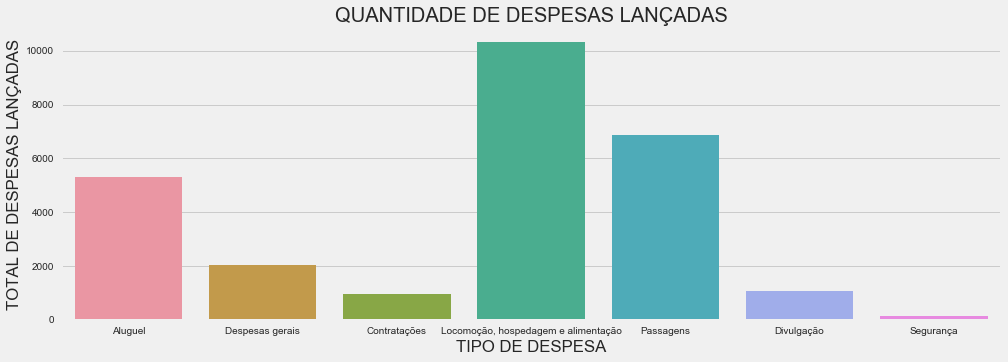

In [31]:
#Criando um gráfico de barras para cada uma dos tipos de despesa do dataset
sns.countplot(data=df, x='TIPO_DESPESA')

#Definindo título
plt.title('QUANTIDADE DE DESPESAS LANÇADAS')
#Definindo o texto que ficará no eixo X e Y
plt.xlabel('TIPO DE DESPESA')
plt.ylabel('TOTAL DE DESPESAS LANÇADAS')
#Exibindo gráfico
plt.show()

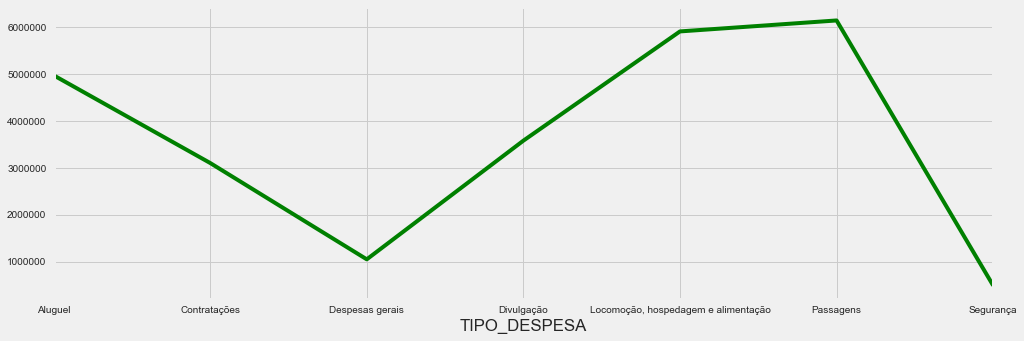

In [41]:
#Criando um gráfico de linhas mostrando as despesas do Senador 29
valores_senador29 = df.groupby('TIPO_DESPESA')['VALOR_REEMBOLSADO'].sum()
valores_senador29.plot(kind='line', rot=0, color='green')

plt.show()

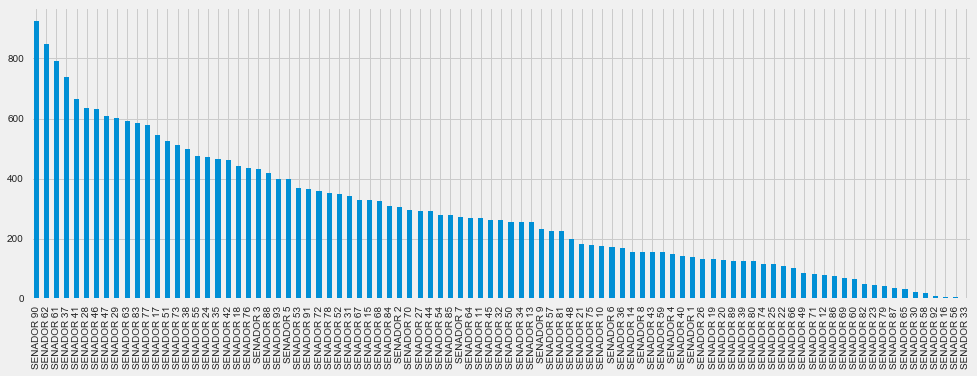

In [45]:
#Verificando a quantidade de despesas lançadas para cada senador.
df['SENADOR'].value_counts().plot(kind='bar')
plt.show()

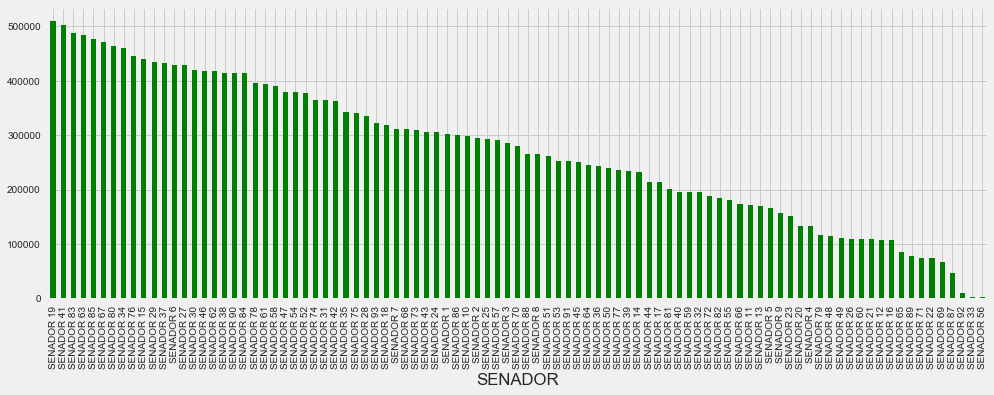

In [47]:
#Verificando os senadores que tiveram mais dinheiro reembolsado, do maior para o menor
valores_senadores = df.groupby('SENADOR')['VALOR_REEMBOLSADO'].sum().sort_values(ascending=False)
valores_senadores.plot(kind='bar', color='green')
plt.show()

In [50]:
#Transformando todos os valores da coluna Data para apenas retornar o ano e mês
df['DATA'] = df['DATA'].apply(lambda x: x.strftime('%Y-%m'))

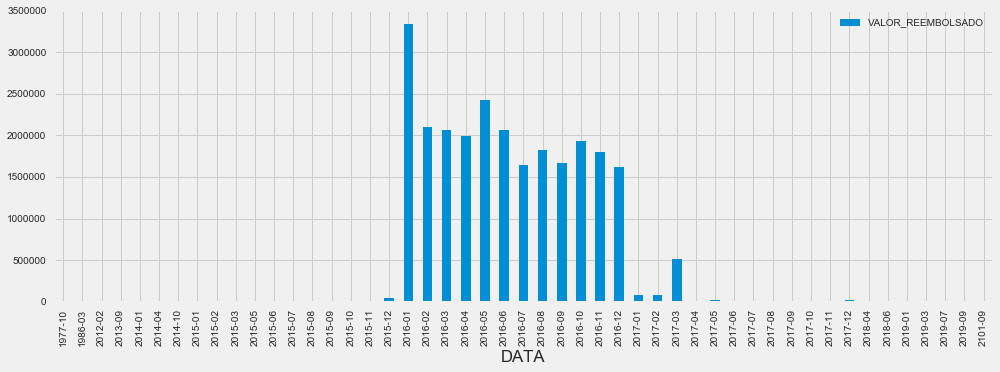

In [53]:
#Verificando o quanto que foi pedido de reembolso durante todos os anos
gastos_por_mes = df.pivot_table(index='DATA', values='VALOR_REEMBOLSADO', aggfunc=np.sum)
gastos_por_mes.plot(kind='bar')
plt.show()

In [56]:
#Verificando a média e mediana dos valores reembolsados
media = df.pivot_table(index='DATA', values='VALOR_REEMBOLSADO', aggfunc=np.mean)
media.columns = ['MEDIA']
mediana = df.pivot_table(index='DATA', values='VALOR_REEMBOLSADO', aggfunc=np.median)
mediana.columns = ['MEDIANA']

#Concatenando os DataFrames e verificando as primeiras linhas
media_mediana = pd.concat([media, mediana], axis=1)
media_mediana.head()

,MEDIA,MEDIANA
DATA,,
1977-10,152.51,152.51
1986-03,139.16,139.16
2012-02,162.40,162.40
2013-09,675.00,675.00
2014-01,374.83,374.83


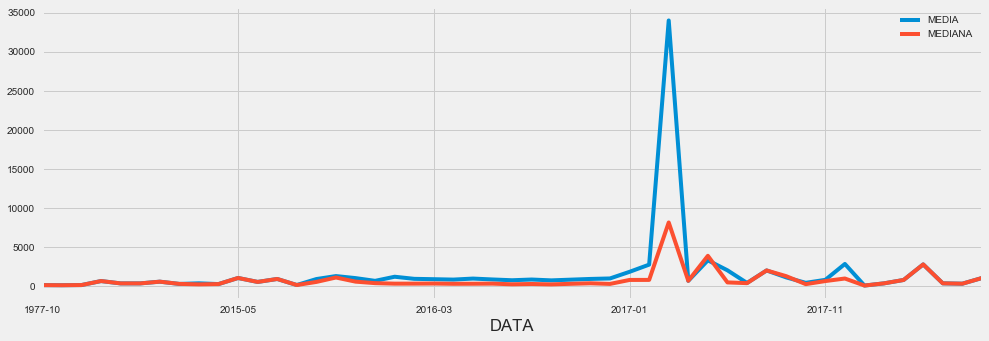

In [57]:
#Plotando a média e mediana dos anos
media_mediana.plot()
plt.show()

In [59]:
#Selecionando reembolsos feitos apenas em 2016
dados2016 = df[(df['DATA'] >= '2016-01') & (df['DATA'] <= '2016-12')]
#Ultimas linhas do arquivo
dados2016.tail()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
26686,2016,12,SENADOR 93,"Locomoção, hospedagem e alimentação",01.245.727/0001-00,Trevo Posto de Serviços Ltda,083555,2016-12,NaN,183.40
26687,2016,12,SENADOR 93,"Locomoção, hospedagem e alimentação",01.245.727/0001-00,Trevo Posto de Serviços Ltda,084787,2016-12,NaN,50.00
26688,2016,12,SENADOR 93,Passagens,09.296.295/0001-60,Azul,QGIJ8X,2016-07,"Companhia Aérea: AZUL, Localizador: QGIJ8X. Pa...",1055.41
26689,2016,12,SENADOR 93,Passagens,21.443.582/0001-50,Pronto Produção de Eventos e Turismo Ltda,S6ZB6L,2016-12,"Companhia Aérea: AZUL, Localizador: S6ZB6L. Pa...",390.18
26690,2016,12,SENADOR 93,Passagens,21.443.582/0001-50,Pronto Produção de Eventos e Turismo Ltda,ZDS6KY,2016-12,"Companhia Aérea: GOL, Localizador: ZDS6KY. Pas...",654.28


In [60]:
#Geração dos dados para o mapa de calor
#Criando uma Pivot Table
mapa_de_calor = dados2016.pivot_table(index='DATA', values='VALOR_REEMBOLSADO', columns='TIPO_DESPESA', aggfunc=np.sum)
mapa_de_calor

TIPO_DESPESA,Aluguel,Contratações,Despesas gerais,Divulgação,"Locomoção, hospedagem e alimentação",Passagens,Segurança
DATA,,,,,,,
2016-01,681720.72,519205.27,130287.53,419496.30,879021.59,425766.63,284426.09
2016-02,355621.91,286143.29,103718.82,252818.74,592270.58,487826.19,21832.40
2016-03,361367.60,255112.80,94986.41,291705.97,440847.14,586842.49,33859.82
2016-04,392789.93,243225.69,93684.00,224044.85,462819.68,549032.37,21978.24
2016-05,765999.20,275629.88,80266.83,263856.45,476910.51,520546.83,39480.96
2016-06,371057.80,219292.74,90153.46,320627.83,423650.18,624275.09,13873.95
2016-07,306088.26,136238.66,67689.75,200566.67,475541.95,453256.15,7124.31
2016-08,252439.17,202764.55,78291.64,256752.60,420363.64,578393.33,34069.32
2016-09,334052.65,107722.85,78875.75,200740.90,473085.66,469299.83,9194.48


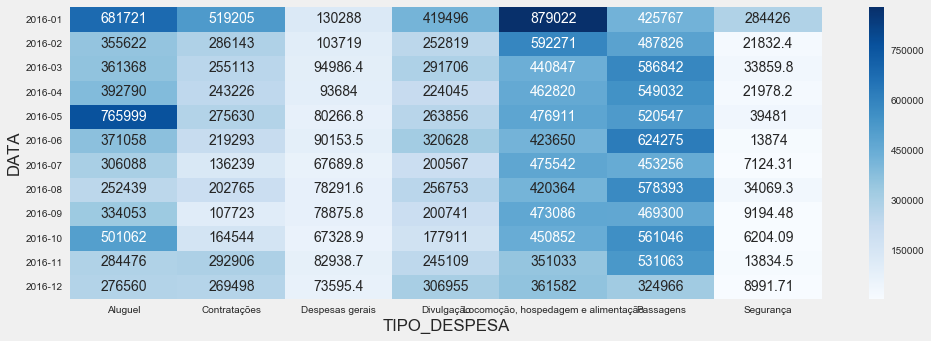

In [66]:
#Gerando o mapa de calor
sns.heatmap(mapa_de_calor, annot=True, fmt='g', cmap='Blues')
plt.show()